# Image classification machine learning algorithm
## Platinum cyclic voltammetry scan facet detection through image classification

Developed by: Heather Baroody and Tasleem Muzaffar
17 May 2018

This is a general image classification model that is trained to distingush between four distinct Platinum cyclic voltammetry scans for different surface facets: Pt(111), Pt(110), Pt(100), and polycrystalline Pt.  This was developed during this 2018 ECS Data Hack Week in Seattle so the goal is to develop a simple model in the short amount of time we have and expand it later. 

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.decomposition import PCA
from PIL import Image

/Users/heatherbaroody/miniconda3/envs/ECStutorial/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Visualizing the data

The data sets were created by extracting Pt(jkl) CV data point from a variety of literature studies, creating standardized .jpg plots of the same dimensions. This way the training data is standarized and the goal is for any CV to eventually work for an input.

In [48]:
#img = Image.open('cvdatatest.png').convert('RGBA')
img = Image.open("pt111-1.jpg").convert('I')
arr = np.array(img)
arr.shape
imgrs = img.resize((100, 100))
arrrs = np.array(imgrs)
#arrrs.shape
print (arrrs)
imgrs.show()


[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


### Collect and clean the data
Loop through and convert all images to array

In [182]:
#Image files

#Pt(111) convert to grayscale
Pt_111_01 = Image.open("pt111-1.jpg").convert('I')
Pt_111_02 = Image.open("pt111-2.jpg").convert('I')
Pt_111_03 = Image.open("pt111-3.jpg").convert('I')
Pt_111_04 = Image.open("pt111-4.jpg").convert('I')
Pt_111_05 = Image.open("pt111-5.jpg").convert('I')
Pt_111_06 = Image.open("pt111-6.jpg").convert('I')
Pt_111_07 = Image.open("pt111-7.jpg").convert('I')
Pt_111_08 = Image.open("pt111-8.jpg").convert('I')
Pt_111_09 = Image.open("pt111-9.jpg").convert('I')
#Pt_111_10 = Image.open("pt111-10.jpg").convert('I')
Pt_111_11 = Image.open("pt111-11.jpg").convert('I')
Pt_111_12 = Image.open("pt111-12.jpg").convert('I')

#Pt(110)
Pt_110_01 = Image.open("pt110-1.jpg").convert('I')
Pt_110_02 = Image.open("pt110-2.jpg").convert('I')
Pt_110_03 = Image.open("pt110-3.jpg").convert('I')
Pt_110_04 = Image.open("pt110-4.jpg").convert('I')
Pt_110_05 = Image.open("pt110-5.jpg").convert('I')
Pt_110_06 = Image.open("pt110-6.jpg").convert('I')

#Pt(100)
Pt_100_01 = Image.open("pt100-1.jpg").convert('I')
Pt_100_02 = Image.open("pt100-2.jpg").convert('I')
Pt_100_03 = Image.open("pt100-3.jpg").convert('I')
Pt_100_04 = Image.open("pt100-4.jpg").convert('I')
Pt_100_05 = Image.open("pt100-5.jpg").convert('I')
Pt_100_06 = Image.open("pt100-6.jpg").convert('I')

#Pt(poly)
Pt_poly_01 = Image.open("ptpoly-1.jpg").convert('I')
Pt_poly_02 = Image.open("ptpoly-2.jpg").convert('I')
Pt_poly_03 = Image.open("ptpoly-3.jpg").convert('I')
Pt_poly_04 = Image.open("ptpoly-4.jpg").convert('I')
Pt_poly_05 = Image.open("ptpoly-5.jpg").convert('I')
Pt_poly_06 = Image.open("ptpoly-6.jpg").convert('I')


images = [Pt_111_01, Pt_111_02, Pt_111_03, Pt_111_04, 
         Pt_111_05, Pt_111_06, Pt_111_07, Pt_111_08, 
         Pt_111_09, Pt_111_11, Pt_111_12, Pt_110_01,
         Pt_110_02, Pt_110_03, Pt_110_04, Pt_110_05,Pt_110_06, Pt_100_01,
         Pt_100_02, Pt_100_03, Pt_100_04, Pt_100_05, Pt_100_06, Pt_poly_01,
         Pt_poly_02, Pt_poly_03, Pt_poly_04, Pt_poly_05, Pt_poly_06]

#resize image files
image_rs = []

for i in images:
    image_rs.append(i.resize((100, 100)))

#convert to array
image_ar = []
for j in image_rs:
    image_ar.append(np.array(j))

image_ar = np.array(image_ar)
print(image_ar.shape)

print(image_ar[1])
#image_rs[1].show()

(29, 100, 100)
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In [183]:
data = np.reshape(image_ar, (29, 10000))
data.shape

(29, 10000)

In [184]:
#Define target values

target = np.array([0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3])

facet = ['Pt (111)', 'Pt(110)', 'Pt(100)', 'Pt(poly)']
print(target.shape)

(29,)


Split data

In [185]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

((21, 10000), (8, 10000))


Use Logistic regression

In [186]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

Check accuracy score

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.875

Test other classifier

In [205]:
from sklearn import neighbors

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(data, target)


test = np.array([data[13]])
test.shape
usertest = clf.predict(test)

result = knn.predict(test)

print(facet[result])

knn.predict_proba(test)

Pt(110)


/Users/heatherbaroody/miniconda3/envs/ECStutorial/lib/python2.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  app.launch_new_instance()


array([[ 0. ,  0.8,  0.2,  0. ]])

In [197]:
test = np.array([data[25]])
test.shape
usertest = clf.predict(test)

print (facet[usertest])
#clf.predict_proba(test)


Pt(poly)


/Users/heatherbaroody/miniconda3/envs/ECStutorial/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  """


array([[  9.67636715e-05,   1.68009941e-05,   1.91527434e-05,
          9.99867283e-01]])

Confusion Matrix

In [190]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[4 0 0 0]
 [0 1 1 0]
 [0 0 1 0]
 [0 0 0 1]]


/Users/heatherbaroody/miniconda3/envs/ECStutorial/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


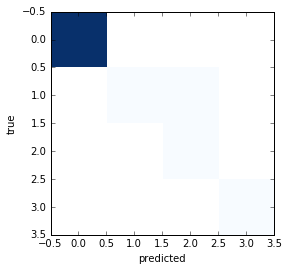

In [191]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

ValueError: total size of new array must be unchanged

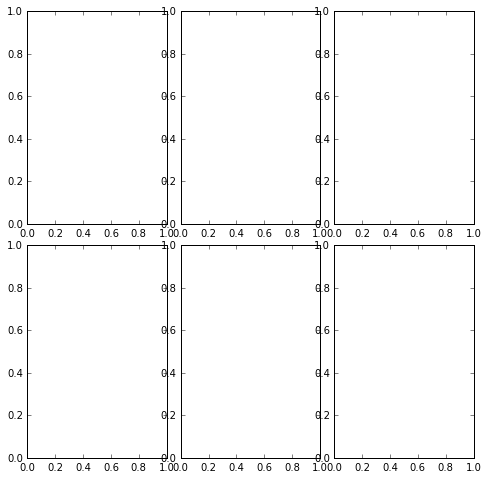

In [157]:
fig, axes = plt.subplots(2,3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])